In [1]:
import numpy as np

# Save fonts into pdf
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
import tqdm.notebook

import sys
sys.path.insert(0, '../utils')

import te_mp

# import scipy.integrate

In [2]:
matplotlib.rcParams.update({'font.size': 8, 'axes.linewidth': 0.5, 'xtick.major.width': 0.5, 'xtick.minor.width': 0.5, 
                            'ytick.major.width': 0.5,'ytick.minor.width': 0.5, 'xtick.major.pad':2,'ytick.major.pad':2})
matplotlib.rcParams.update({'font.family':'sans-serif','font.sans-serif':['Arial'], 'mathtext.default':'sf','mathtext.fontset':'custom'})

matplotlib.rcParams.update({'savefig.transparent':True})

# Setup variables

In [3]:
# Simulation time step size (s)
dt_trial = 2e-3

# Total time per block (s)
T_max_full = 0.75
T_min_full = -0.25
T = T_max_full - T_min_full

T_min = 0
t_min_ind = int((T_min-T_min_full)/dt_trial)
T_max = 0.5
t_max_ind = int((T_max - T_min_full)/dt_trial)


# Array of time steps
t_trial = np.arange(0, int(T/dt_trial))*dt_trial + T_min_full

In [4]:
# Time vector for eligibility window
dt_mp = dt_trial
T_mp_max = 0.2

tau = np.arange(0, int(T_mp_max/dt_mp))*dt_mp

In [7]:
## Visual (optokinetic ) stimulus

peak_stim_vel = 10 # deg/s
f = 1 # Hz
stim_vel_f = lambda t: -peak_stim_vel*np.sin(2*np.pi*f*t)
direct_pathway_f = lambda t: -peak_stim_vel*np.sin(2*np.pi*f*(t-0.04))

In [8]:
avg_sensitivity_to_pc = 0.01

# Load simulation results

In [6]:
# Results of running timer-selection-integrated.py for 10 simulation blocks
# of 1,000,000 trials, and a sample interval of 1,000 trials

folder = 'files/okr'

eye_history_untuned = np.load(folder+'/eye_history_untuned.npy')
eye_history_no_noise_untuned =  np.load(folder+'/eye_history_no_noise_untuned.npy')
# w_final_untuned = np.load(folder+'/w_final_untuned.npy' )
# w_avg_final_untuned = np.load(folder+'/w_avg_final_untuned.npy' )

eye_history_tuned = np.load(folder+'/eye_history_tuned.npy')
eye_history_no_noise_tuned =  np.load(folder+'/eye_history_no_noise_tuned.npy')
# w_final_tuned = np.load(folder+'/w_final_tuned.npy' )
# w_avg_final_tuned = np.load(folder+'/w_avg_final_tuned.npy' )

In [9]:
eye_learned_final_untuned = (((1-avg_sensitivity_to_pc)*eye_history_no_noise_untuned
                            + eye_history_untuned*avg_sensitivity_to_pc))

eye_learned_final_tuned = (((1-avg_sensitivity_to_pc)*eye_history_no_noise_tuned
                            + eye_history_tuned*avg_sensitivity_to_pc)) 

In [10]:
eye_history_mu_untuned = np.mean(eye_learned_final_untuned,axis=0)
eye_history_std_untuned = np.std(eye_learned_final_untuned,axis=0)

eye_history_mu_tuned = np.mean(eye_learned_final_tuned,axis=0)
eye_history_std_tuned = np.std(eye_learned_final_tuned,axis=0)

In [13]:
baseline_gain_untuned = 0.35
baseline_gain_tuned = 0.35

## Plot pre/post learning

In [19]:
direct_pathway_plot = direct_pathway_f(t_trial[t_min_ind:t_max_ind])
stim_plot = stim_vel_f(t_trial[t_min_ind:t_max_ind])

### Using untuned (coincident) plasticity

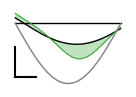

In [21]:
plt.figure(figsize=(1.5,1))


plt.plot([t_trial[t_min_ind], t_trial[t_max_ind]],[0,0], c='k',lw=1)

plt.fill_between(t_trial[t_min_ind:t_max_ind], 
                 baseline_gain_untuned*direct_pathway_plot, 
                 baseline_gain_untuned*direct_pathway_plot +  eye_history_mu_untuned[t_min_ind:t_max_ind,-1],
                 color='C2', alpha=0.3, edgecolor=None)

plt.plot(t_trial[t_min_ind:t_max_ind], baseline_gain_untuned*direct_pathway_plot, c='k',lw=1)
plt.plot(t_trial[t_min_ind:t_max_ind], baseline_gain_untuned*direct_pathway_plot + eye_history_mu_untuned[t_min_ind:t_max_ind,-1], c='C2',lw=0.75)

plt.plot(t_trial[t_min_ind:t_max_ind], stim_plot, c=(0.5,)*3,lw=1)

plt.plot([0,0],[-4,-9], c='k')
plt.plot([0,0.1],[-9,-9],c='k')

plt.axis('off');
# plt.savefig('figures/learning-temp-before.pdf')

### Using tuned (120 ms) plasticity rule

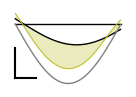

In [22]:
plt.figure(figsize=(1.5,1))


plt.plot([t_trial[t_min_ind], t_trial[t_max_ind]],[0,0], c='k',lw=1)

plt.fill_between(t_trial[t_min_ind:t_max_ind], 
                 baseline_gain_tuned*direct_pathway_plot, 
                 baseline_gain_tuned*direct_pathway_plot +  eye_history_mu_tuned[t_min_ind:t_max_ind,-1],
                 color='C8', alpha=0.3, edgecolor=None)

plt.plot(t_trial[t_min_ind:t_max_ind], baseline_gain_tuned*direct_pathway_plot, c='k',lw=1)
plt.plot(t_trial[t_min_ind:t_max_ind], baseline_gain_tuned*direct_pathway_plot + eye_history_mu_tuned[t_min_ind:t_max_ind,-1], c='C8',lw=0.75)

plt.plot(t_trial[t_min_ind:t_max_ind], stim_plot, c=(0.5,)*3,lw=1)

plt.plot([0,0],[-4,-9], c='k')
plt.plot([0,0.1],[-9,-9],c='k')

plt.axis('off');
# plt.savefig('figures/learning-temp-before.pdf')

### Learned component

([<matplotlib.axis.XTick at 0x15255d6d0>,
 [Text(0.0, 0, '0.00'), Text(0.25, 0, '0.25'), Text(0.5, 0, '0.50')])

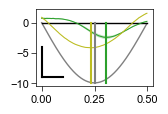

In [32]:
plt.figure(figsize=(1.5,1))

plt.plot(t_trial[t_min_ind:t_max_ind], stim_plot, c=(0.5,)*3,lw=1)
plt.plot([t_trial[t_min_ind], t_trial[t_max_ind]],[0,0], c='k',lw=1)

plt.fill_between(t_trial[t_min_ind:t_max_ind], eye_history_mu_untuned[t_min_ind:t_max_ind,-1]-eye_history_std_untuned[t_min_ind:t_max_ind,-1], 
                 eye_history_mu_untuned[t_min_ind:t_max_ind,-1]+eye_history_std_untuned[t_min_ind:t_max_ind,-1],
                 color='C2', alpha=0.3, edgecolor=None)

plt.fill_between(t_trial[t_min_ind:t_max_ind], eye_history_mu_tuned[t_min_ind:t_max_ind,-1]-eye_history_std_tuned[t_min_ind:t_max_ind,-1], 
                 eye_history_mu_tuned[t_min_ind:t_max_ind,-1]+eye_history_std_tuned[t_min_ind:t_max_ind,-1], color='C8', alpha=0.3, edgecolor=None)

plt.plot(t_trial[t_min_ind:t_max_ind], eye_history_mu_untuned[t_min_ind:t_max_ind,-1], c='C2',lw=0.75)
plt.plot(t_trial[t_min_ind:t_max_ind], eye_history_mu_tuned[t_min_ind:t_max_ind,-1],c='C8',lw=0.75)

plt.plot([t_trial[np.argmin(eye_history_mu_untuned[:,-1]),]]*2,[0,-10],c='C2' )
plt.plot([t_trial[np.argmin(eye_history_mu_tuned[:,-1]),]]*2,[0,-10],c='C8' )
plt.plot([0.25,]*2,[0,-10],c=(0.5,)*3 ) # peak of stimulus
plt.plot([0,0],[-4,-9], c='k')
plt.plot([0,0.1],[-9,-9],c='k')

plt.xticks([0, 0.25, 0.5])
# plt.axis('off')
# plt.savefig('figures/learning-temp-before-after.pdf');